In [174]:
import pandas as pd
import hvplot.pandas
from bokeh.models.formatters import BasicTickFormatter

In [155]:
df = pd.read_csv("Bitcoin.csv")
df = df.set_index(pd.DatetimeIndex(df["Date"].values))
df_2 = df.drop(columns=["Date","Change %"],axis=1)
df_2

,Price
2011-11-28,2.5
2011-11-29,2.8
2011-11-30,3.0
2011-12-01,3.1
2011-12-02,3.1
...,...
2022-02-01,38709.7
2022-02-02,36890.2
2022-02-03,37287.8
2022-02-04,41567.6


# Bitcoins Daily Returns

In [195]:
# Calculate the daily return using the 'shift()' function
daily_returns = df_2.pct_change()
daily_returns.to_csv("BtcReturns.csv")
# Plot pct change vs Prcice

In [157]:
# Plot the daily returns of Bitcoin
daily_returns.hvplot(figsize=(10,5))

:Curve   [index]   (Price)

In [158]:
# daily returns during bitcoin halving Nov 28 2012
halving_1 = daily_returns.loc['2011-11-28':'2014-11-28']
halving_1

# daily returns during bitcoin halving July 9 2016
halving_2 = daily_returns.loc['2015-07-09':'2018-07-09']
halving_2

# daily returns during bitcoin halving May 11 2020
halving_3 = daily_returns.loc['2019-05-11':'2022-02-04']
halving_3

,Price
2019-05-11,0.125947
2019-05-12,-0.028580
2019-05-13,0.117570
2019-05-14,0.024161
2019-05-15,0.021264
...,...
2022-01-31,0.015320
2022-02-01,0.005483
2022-02-02,-0.047004
2022-02-03,0.010778


<AxesSubplot:>

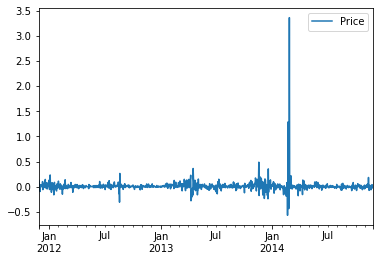

In [159]:
# Display chart of SP500 daily returns during bitcoins 1st halving event. Nov 28 2012
halving_1.plot()

<AxesSubplot:>

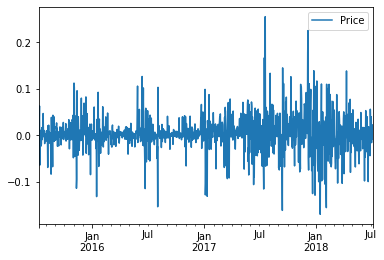

In [160]:
# Display chart of SP500 daily returns during bitcoins 2nd halving event. July 9 2016
halving_2.plot()

<AxesSubplot:>

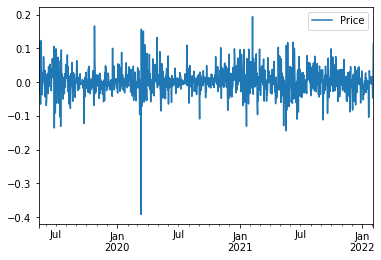

In [162]:
# Display chart of SP500 daily returns during bitcoins 3rd halving event. May 11 2020
halving_3.plot()

<AxesSubplot:>

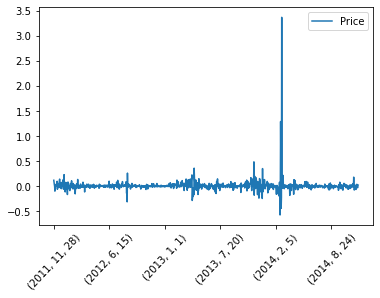

In [191]:
# Group by year, month, and day and grab first of each group
halving_1_split = halving_1.groupby([halving_1.index.year, halving_1.index.month, halving_1.index.day]).first()
halving_1_split.plot(rot=47)

In [192]:
halving_3_ = halving_3.groupby([halving_3.index.year, halving_3.index.month, halving_3.index.day]).first()
halving_3_


Price
2019 5 11  0.125947
       12 -0.028580
       13  0.117570
       14  0.024161
       15  0.021264
...             ...
2022 1 31  0.015320
     2 1   0.005483
       2  -0.047004
       3   0.010778
       4   0.114777

[1001 rows x 1 columns]

<AxesSubplot:>

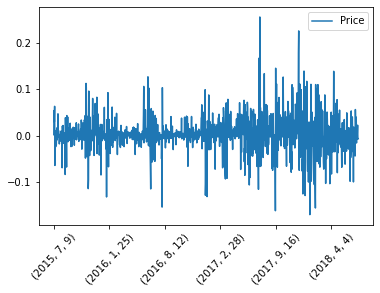

In [193]:
# Group by year, month, and day and grab first of each group
halving_2_split = halving_2.groupby([halving_2.index.year, halving_2.index.month, halving_2.index.day]).first()
halving_2_split.plot(rot=47)

<AxesSubplot:>

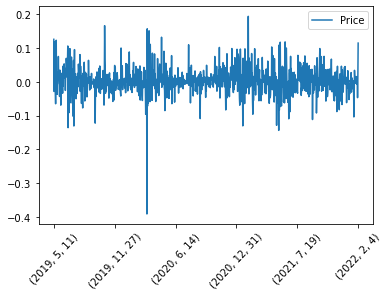

In [194]:
# Group by year, month, and day and grab first of each group
halving_3_split = halving_3.groupby([halving_3.index.year, halving_3.index.month, halving_3.index.day]).first()
halving_3_split.plot(rot=47)

# Bitcoins Cumulative Returns

In [151]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.head()

,Price
2011-11-28,NaN
2011-11-29,1.12
2011-11-30,1.20
2011-12-01,1.24
2011-12-02,1.24


In [153]:
# Plot the daily returns of the Bitcoin over the last 5 years
#cumulative_returns.hvplot(figsize=(10,5))
cumulative_plot = cumulative_returns.hvplot(title="Bitcoins Cumulative Returns",
                        grid=True,xlabel='Date',ylabel='Bitcoin Price',color="green",legend="top",fontsize=12)
cumulative_plot

:Curve   [index]   (Price)

# Bitcoin Price vs Cumulative Returns

In [90]:
# Make a data frame containing Bitcoins Price and Cumulative Returns
combined_df = pd.DataFrame()
combined_df["Date"] = df["Date"]
combined_df["BTC Price"] = df["Price"]
combined_df["BTC Cumulative Returns"] = cumulative_returns["Price"]
#combined_df = df.set_index(pd.DatetimeIndex(df["Date"].values))
combined_df = combined_df.drop("Date",axis=1)
combined_df
# 12% increase . Pct increase

,BTC Price,BTC Cumulative Returns
2011-11-28,2.5,NaN
2011-11-29,2.8,1.12
2011-11-30,3.0,1.20
2011-12-01,3.1,1.24
2011-12-02,3.1,1.24
...,...,...
2022-02-01,38709.7,15483.88
2022-02-02,36890.2,14756.08
2022-02-03,37287.8,14915.12
2022-02-04,41567.6,16627.04


In [91]:
# Plot Relationship between Bitcoins Price vs Bitcoins Cumulative Returns
combined_plot = combined_df.hvplot(title="Bitcoins Price vs Cumulative Returns",
                        grid=True,xlabel='Date',ylabel='Bitcoin Price',color="black",fontsize=12,legend="top",frame_width=800,height=500)
combined_plot
# Use the hvplot dashboard to show returns every two years

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [134]:
combined_scatter = combined_df
combined_scatter = combined_scatter.reset_index()
combined_scatter = combined_scatter.drop("index", axis= 1)
combined_scatter = combined_scatter.set_index("BTC Price")
combined_scatter.hvplot(kind="scatter")

:Scatter   [BTC Price]   (BTC Cumulative Returns)

# Price Vs Price Change Scatter Plot

In [139]:
# Price Vs Price Change 
price_change_df = df_2
price_change_df["Price Change"] = df_2 - df_2.shift(1)
price_change_df = price_change_df.reset_index()
price_change_df = price_change_df.drop(columns = ["Daily Returns","index"],axis=1)
price_change_df = price_change_df.set_index("Price")
price_change_df.head()

,Price Change
Price,
2.5,NaN
2.8,0.3
3.0,0.2
3.1,0.1
3.1,0.0


In [140]:
# Plot Price Change vs Price
price_change_df.hvplot(kind="scatter",yformatter='%.0f')
# Price PCT Change

:Scatter   [Price]   (Price Change)

In [129]:
price_change = df_2
price_change = price_change.drop("Daily Returns",axis=1)
price_change

,Price,Price Change
2011-11-28,2.5,NaN
2011-11-29,2.8,0.3
2011-11-30,3.0,0.2
2011-12-01,3.1,0.1
2011-12-02,3.1,0.0
...,...,...
2022-02-01,38709.7,211.1
2022-02-02,36890.2,-1819.5
2022-02-03,37287.8,397.6
2022-02-04,41567.6,4279.8


In [138]:
price_change.hvplot(kind="line",yformatter='%.0f')
# Pct Change

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [142]:
import seaborn as sns
price_change.corr()

,Price,Price Change
Price,1.000000,0.037461
Price Change,0.037461,1.000000


<AxesSubplot:>

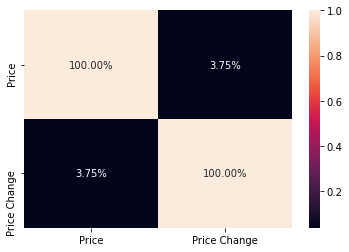

In [143]:
sns.heatmap(price_change.corr(), annot=True, fmt=".2%")